In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix

In [ ]:
# Q = VEHICLE CAPACITY - 200
# Define K (Max amount of vechile)
# 'Ready time' is the earliest time at which service may start at the given customer/depot.
# 'Due date' is the latest time at which service may start at the given customer/depot.
# The value of travel time is equal to the value of distance.

# Here you find pointers to instance definitions and  
# best known solutions for the 25 and 50 customer instances 
# of Solomon's VRPTW benchmark problems from 1987. For the 100 
# customer instances you will find a table of the best known 
# results, as reported to us. The version reported here has a 
# hierarchical objective: 1) Minimize number of vehicles 2) 
# Minimize total distance. Distance is Euclidean, and the value 
# of travel time is equal to the value of distance between two nodes. 
# Distance and time should be calculated with double precision, 
# total distance results are rounded to two decimals in the tables below. 
# Exact methods typically use a monolithic total distance objective and 
# use integral or low precision distance and time calculations. Hence, results are not directly comparable.

# Show that node 0 is allowed to be visited multipletimes
# Might only apply the constrainst on only the vechile matrix
# Duplicate the 0 Node so that it can be mutiple times in the solution space without breaking the constraints for begining and end
# Duplicate given K (num of vechiles)

# constructs node by node
# travel by probabilites

# popluations (diffrent initilazations) and generations (itterations)

example 1
[#1_#4_0, 2, 2, #2_4, #3_8][0, 3, 4, 0] # breaks the constrains

example 2
[#1_0, 2, 2, #2_4, #3_8, #4_0][0, 3, 4, 5] # does not break the constraint

example 3
[#1_0, 0, 2, 2, #2_4, #3_8, #4_0, 0][0, 4, 5, 6] # does not break the constraint
[0, #1_0, #2_2, #3_2, 4, 8, 0, #4_0][1, 2, 3, 7] # does not break the constraint

In [20]:
data = pd.read_csv("ACO data.csv")
x = data["XCOORD."]
y = data["YCOORD."]
nodes = np.vstack((x,y))
nodes = nodes.T
data

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,35,35,0,0,230,0
1,2,41,49,10,161,171,10
2,3,35,17,7,50,60,10
3,4,55,45,13,116,126,10
4,5,55,20,19,149,159,10
...,...,...,...,...,...,...,...
96,97,22,27,11,135,145,10
97,98,25,21,12,133,143,10
98,99,19,21,10,58,68,10
99,100,20,26,9,83,93,10


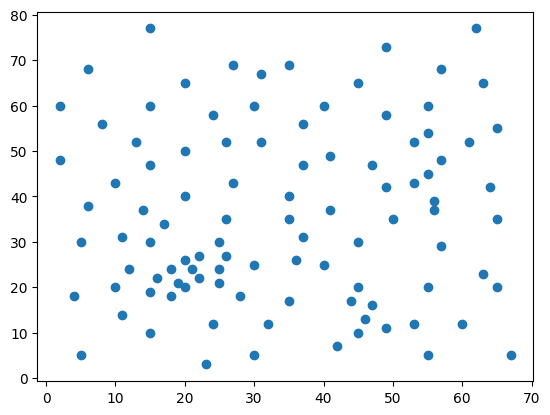

In [17]:
plt.scatter(x,y)
plt.show()

In [18]:
distanceMatrix = pdist(nodes)

In [19]:
df = pd.DataFrame(nodes, columns=[nodes[0]])
Distance_Matrix = pd.DataFrame(distance_matrix(df.values, df.values))
Distance_Matrix

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,15.231546,18.000000,22.360680,25.000000,20.615528,11.180340,21.213203,26.248809,32.015621,...,25.612497,18.384776,20.248457,12.041595,14.866069,15.264338,17.204651,21.260292,17.492856,24.041631
1,15.231546,0.000000,32.557641,14.560220,32.202484,32.202484,24.839485,21.023796,31.575307,17.804494,...,39.698866,33.015148,33.970576,26.627054,29.681644,29.068884,32.249031,35.608988,31.144823,38.600518
2,18.000000,32.557641,0.000000,34.409301,20.223748,23.853721,16.401219,36.249138,36.069378,47.423623,...,20.099751,13.928388,18.384776,13.453624,12.206556,16.401219,10.770330,16.492423,17.492856,17.029386
3,22.360680,14.560220,34.409301,0.000000,25.000000,42.720019,33.541020,35.355339,45.044423,15.000000,...,47.707442,40.224371,42.544095,34.132096,36.619667,37.589892,38.418745,43.266615,39.824616,45.803930
4,25.000000,32.202484,20.223748,25.000000,0.000000,41.231056,31.622777,46.097722,50.537115,40.000000,...,40.012498,33.060551,37.215588,29.832868,30.265492,33.734256,30.016662,36.013886,35.510562,37.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,15.264338,29.068884,16.401219,37.589892,33.734256,7.615773,4.242641,23.086793,20.000000,46.669048,...,10.630146,5.000000,5.000000,4.000000,4.242641,0.000000,6.708204,6.708204,2.236068,9.848858
97,17.204651,32.249031,10.770330,38.418745,30.016662,13.453624,9.000000,29.427878,26.627054,49.203658,...,10.198039,3.162278,7.615773,6.082763,3.000000,6.708204,0.000000,6.000000,7.071068,7.615773
98,21.260292,35.608988,16.492423,43.266615,36.013886,9.848858,10.816654,29.017236,23.769729,53.075418,...,4.472136,3.162278,3.162278,9.219544,6.708204,6.708204,6.000000,0.000000,5.099020,3.162278
99,17.492856,31.144823,17.492856,39.824616,35.510562,6.403124,6.403124,24.000000,19.723083,48.795492,...,8.602325,4.472136,2.828427,6.082763,5.385165,2.236068,7.071068,5.099020,0.000000,8.246211


from 0 List (row 0)
to 0 list (column 0)

path = []

take best route from start 0 list
for i in nodes  
  check if need to go back to 0 (in regard to due time)
    if yes go back to 0
  find next best node with in time frame and go there
  add travel time + service time
  